# Introduction to Data Science using Python



## Abhijit Dasgupta

## Day Two

| Day 1                        | Day 2                |
| ---------------------------- | -------------------- |
| Why Python for Data Science? | Data visualization   |
| A Python Primer              | Statistical modeling |
| Pandas for data munging      | Machine learning     |

| Topic                                          | Notebook           |
| ---------------------------------------------- | ------------------ |
| Python primer                                  | 00_python_primer   |
| Numpy and the data science stack (not covered) | 01_python_tools_ds |
| Pandas for data munging                        | 02_python_pandas   |
| Data visualization                             | 03_python_vis      |
| Statistical modeling                           | 04_python_stat     |
| Machine learning                               | 05_python_learning |


## Data visualization

Data visualization is a basic task in data exploration and understanding. 

Data visualization provides an opportunity to enhance communication of the story within the data. 

A visual representation of the data and our innate ability at pattern recognition can help reveal the complexities in a cognitively accessible way.

### Florence Nightangle, Crimean War

<center><img src="graphs/rose.jpg"/></center>

<div style="margin-top:100px;">

+ Plotting war dead in Crimean war
+ Developed "rose plot"
+ Made point that most deaths were due to sepsis in hospital
</div>

### John Snow, 1854

<center><img src = "graphs/snow_map.png" align="center" width="600" height="600"/></center>









<div style="margin-top: 100px;">

+ Cholera outbreak in London
+ Spatial mapping of households with cholera showed clustering
+ Helped identify wells that were contaminated
</div>

## Why do we need visualization on top of analytics?

![](graphs/anscombe.png)

In both sets of plots, all the variables have the same means and variances and the same pairwise correlations

![](graphs/datasaurus.png)


|      Strip plot      |       Boxplot        |     Violin plot      |
| :------------------: | :------------------: | :------------------: |
| ![](graphs/box1.png) | ![](graphs/box2.png) | ![](graphs/box3.png) |


## General concepts

#### Begin with the consumer in mind

+ You have a deep understanding of the data you're presenting
+ The person seeing the visualization **doesn't**
+ Develop simpler visualizations first that are easier to explain

#### Tell a story

+ Make sure the graphic is clear
+ Make sure the main point you want to make "pops"

#### A matter of perception

+ Color (including awareness of color deficiencies)
+ Shape
+ Fonts


## Our starting point

We will start our journey today from the `pandas` `DataFrame`

+ Rectangular set of data
+ Different columns can be of different types


We will see different functions applied to `DataFrame` objects (on the right)

We will see different functions from different packages applied on `DataFrame` objects (on the left)

## Python setup

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
sns.set_context('notebook')
sns.set_style('white', {'font.family':'Futura', 'text.color':'1'})

## Python setup

In [37]:
mtcars = pd.read_csv('data/mtcars.csv')

mtcars.head()

,make,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


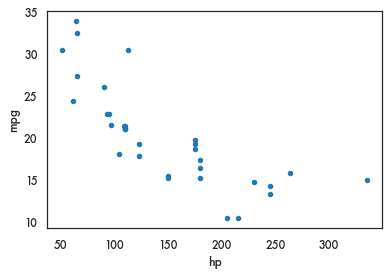

In [38]:
mtcars.plot(x = 'hp', y = 'mpg', 
            kind = 'scatter')

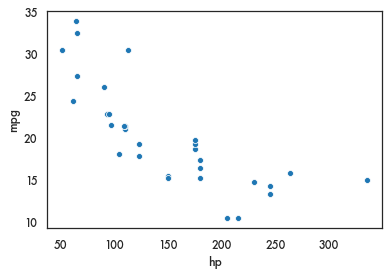

In [39]:
sns.scatterplot(data=mtcars, 
                x = 'hp', y = 'mpg')

#### A ggplot clone

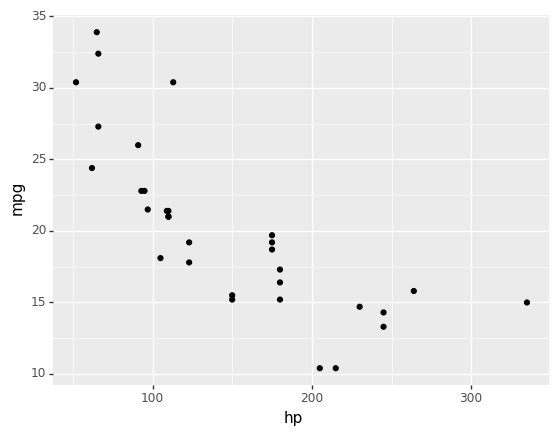

<ggplot: (317677087)>

In [40]:
from plotnine import *

(ggplot(mtcars) + 
    aes(x = 'hp', y = 'mpg')+
    geom_point())

## Some dynamic options

In [41]:
import plotly.express as px

fig = px.scatter(mtcars, x = 'hp', y = 'mpg')
fig.show()

In [42]:
from bokeh.plotting import figure, output_file
from bokeh.io import output_notebook, show
output_notebook()
p = figure()
p.xaxis.axis_label = 'Horsepower'
p.yaxis.axis_label = 'Miles per gallon'

p.circle(mtcars['hp'], mtcars['mpg'], size=10);

show(p)

Loading BokehJS ...

In [43]:
import altair as alt

alt.Chart(mtcars).mark_point().encode(
    x='hp',
    y='mpg'
).interactive()

alt.Chart(...)

## Static plots

A pathway to learning ([Chris Moffit](https://pbpython.com/effective-matplotlib.html))

1. Learn the basic matplotlib terminology, specifically what is a `Figure` and an `Axes` .
2. Always use the object-oriented interface. Get in the habit of using it from the start of your analysis. (*not really getting into this, but basically don't use the Matlab form that was originally used*)
3. Start your visualizations with basic pandas plotting.
4. Use seaborn for the more complex statistical visualizations.
5. Use matplotlib to customize the pandas or seaborn visualization.


### Histogram

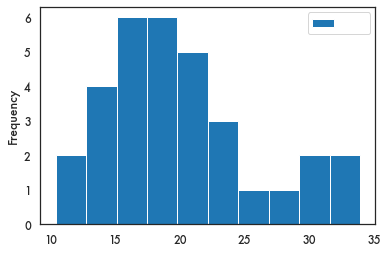

In [44]:
#mtcars.plot.hist(y = 'mpg');
#mtcars['mpg'].plot(kind = 'hist')

mtcars.plot(y = 'mpg', kind = 'hist')
plt.show()

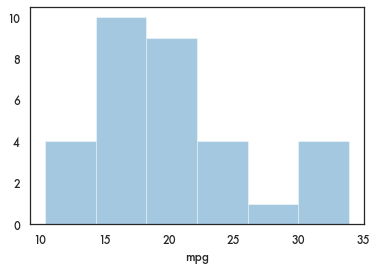

In [45]:
sns.distplot(mtcars.mpg, kde=False)
plt.show()

### Bar plot

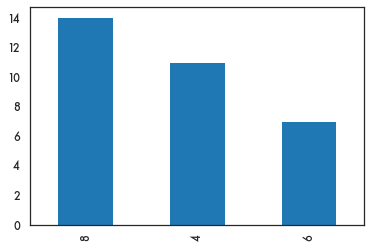

In [46]:
mtcars['cyl'].value_counts().plot.bar();
plt.show()

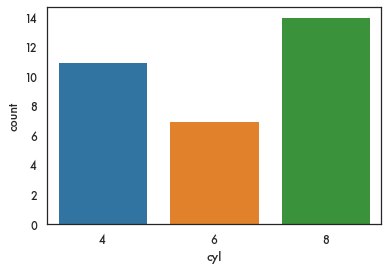

In [47]:
sns.countplot(data = mtcars, x = 'cyl');
plt.show()

### Scatter plot

In [48]:
diamonds = pd.read_csv('data/diamonds.csv.gz')

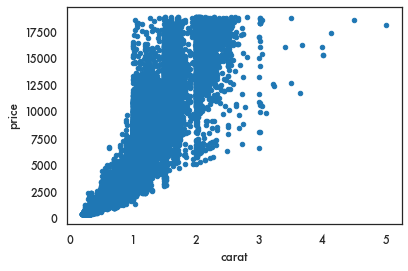

In [49]:
diamonds.plot(x = 'carat', y = 'price', 
              kind = 'scatter');

plt.show()

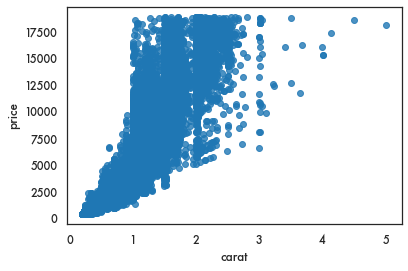

In [50]:
sns.regplot(data = diamonds, 
            x = 'carat', y = 'price', 
            fit_reg=False);
plt.show()

### Box plot

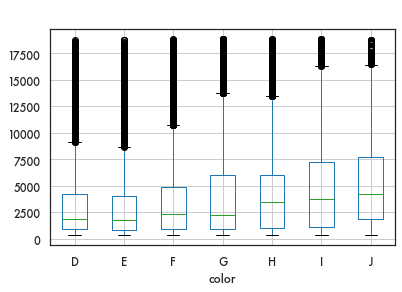

In [51]:
diamonds.boxplot(column = 'price', by = 'color');
plt.show()

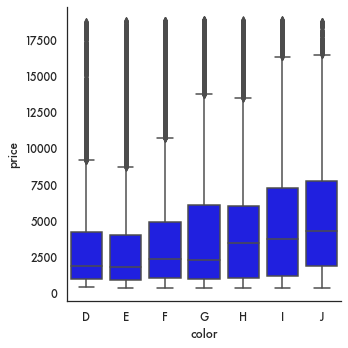

In [52]:
ordered_color = ['D','E','F','G','H','I','J']
sns.catplot(data = diamonds, x = 'color', y = 'price', 
            order = ordered_color, color = 'blue', kind = 'box');
plt.show()

### Barplot (categorical vs continuous)

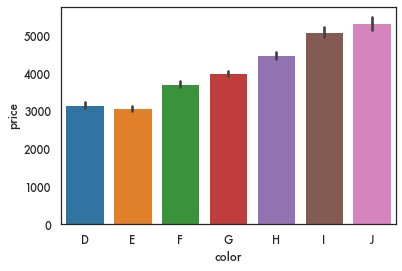

In [53]:
ordered_colors = ['D','E','F','G','H','I','J']
sns.barplot(data = diamonds, x = 'color', y = 'price', order = ordered_colors);
plt.show()

### Joint plot

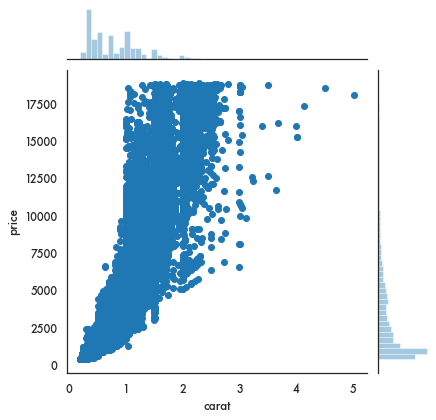

In [54]:
sns.jointplot(data = diamonds, x = 'carat', y = 'price');
plt.show()

## Facets and multiples

### Line plots

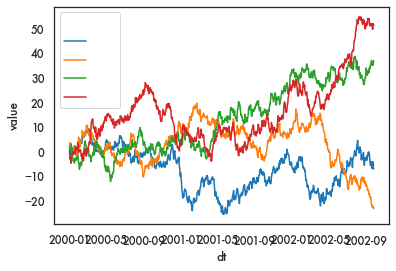

In [55]:
ts = pd.read_csv('data/ts.csv')
ts.dt = pd.to_datetime(ts.dt)
sns.lineplot(data = ts, x = 'dt', y = 'value', hue = 'kind');
plt.show()

### Facets

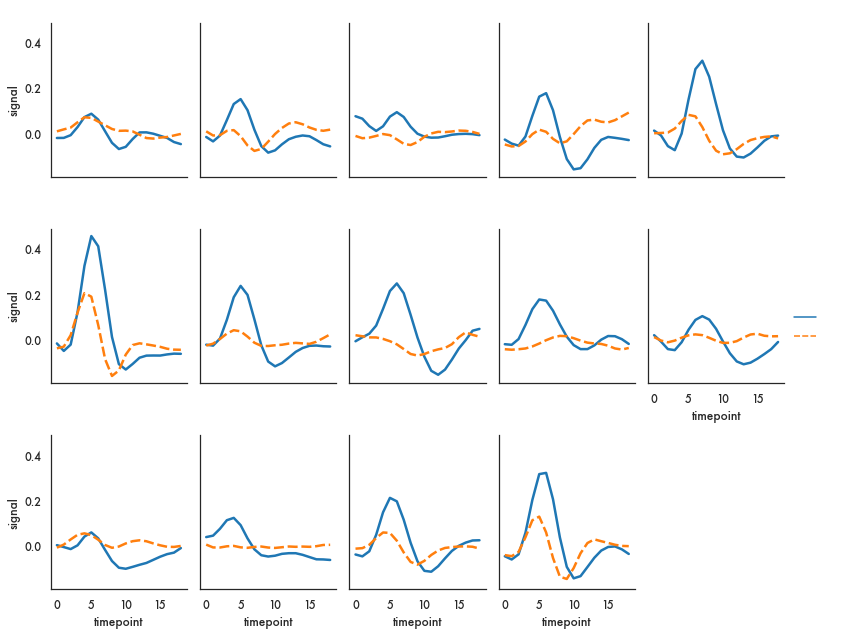

In [56]:
fmri = sns.load_dataset('fmri')
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

### Pairs plot

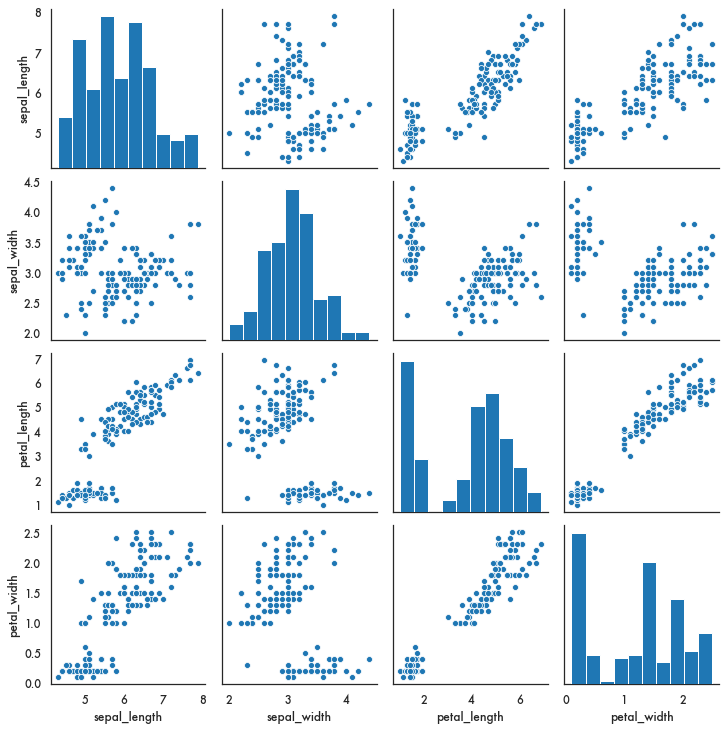

In [58]:
iris = pd.read_csv('data/iris.csv')
sns.pairplot(data=iris);

# Statistical modeling

## Descriptive statistics

+ Several descriptive statistics are available through **numpy**, like `mean`, `std` (standard deviation), `median`,`value_counts` (frequency distribution)
+ We take advantage of split-apply-combine to investigate and describe data

In [ ]:
diamonds = pd.read_csv('data/diamonds.csv.gz')

In [62]:
(diamonds.groupby('color').price.
     agg([np.mean, np.median, np.std]))

,mean,median,std
color,,,
D,3169.954096,1838.0,3356.590935
E,3076.752475,1739.0,3344.158685
F,3724.886397,2343.5,3784.992007
G,3999.135671,2242.0,4051.102846
H,4486.669196,3460.0,4215.944171
I,5091.874954,3730.0,4722.387604
J,5323.818020,4234.0,4438.187251


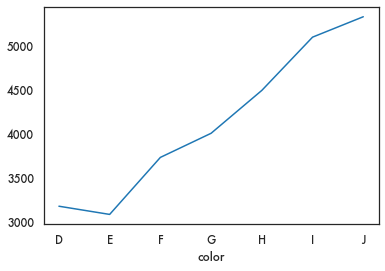

In [66]:
(diamonds.groupby('color').price.
     mean().plot());

## Hypothesis tests

```
import scipy.stats
```

| Function           | Test                                                    |
| :----------------- | ------------------------------------------------------- |
| `ttest_1samp`      | One-sample t-test                                       |
| `ttest_ind`        | Two-sample t-test                                       |
| `ttest_rel`        | Paired t-test                                           |
| `wilcoxon`         | Wilcoxon signed-rank test (nonparametric paired t-test) |
| `mannwhitneyu`         | Wilcoxon rank-sum test (nonparametric 2-sample t-test)  |
| `chi2_contingency` | Chi-square test for independence                        |
| `fisher_exact`     | Fisher's exact test on a 2x2 contingency table          |
| `f_oneway`         | One-way ANOVA                                           |
| `pearsonr`         | Testing for correlation                                 |
|                    |                                                         |


```
import statsmodels.stats
```

| Functions           | Tests                                 |
| :------------------ | ------------------------------------- |
| `proportions_ztest` | Test for difference in proportions    |
| `mcnemar`           | McNemar's test                        |
| `sign_test`         | Sign test                             |
| `multipletests`     | p-value correction for multiple tests |
| `fdrcorrection`     | p-value correction by FDR             |
|                     |                                       |



In [68]:
brca = pd.read_csv('data/brca.csv')
brca.columns = brca.columns.str.replace(' ', '_')
brca.head()

,Unnamed:_0,Complete_TCGA_ID,Gender,Age_at_Initial_Pathologic_Diagnosis,ER_Status,PR_Status,HER2_Final_Status,Tumor,Tumor--T1_Coded,Node,...,NP_001193600,NP_061134,NP_932347,NP_003593,NP_997203,NP_001191293,NP_775791,NP_004065,NP_068752,NP_219494
0,0,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,...,NaN,NaN,1.153614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,...,0.048144,NaN,-0.881872,2.527072,-8.111243,-16.029761,-2.046065,-1.778435,NaN,-3.069752
2,2,TCGA-A7-A0CE,FEMALE,57,Negative,Negative,Negative,T2,T_Other,N0,...,0.644347,NaN,1.625952,NaN,NaN,NaN,-1.306238,NaN,NaN,NaN
3,3,TCGA-D8-A142,FEMALE,74,Negative,Negative,Negative,T3,T_Other,N0,...,-5.107629,-0.97598,NaN,2.508629,-12.337110,-9.546530,-4.066584,NaN,NaN,NaN
4,4,TCGA-AO-A0J6,FEMALE,61,Negative,Negative,Negative,T2,T_Other,N0,...,-1.043420,NaN,NaN,NaN,-3.231339,NaN,NaN,NaN,NaN,-3.753616


In [71]:
import scipy as sc
import statsmodels as sm
test_probe = 'NP_001193600'

tst = sc.stats.ttest_ind(
    brca[brca.ER_Status=='Positive'][test_probe],
    brca[brca.ER_Status=='Negative'][test_probe],
    nan_policy = 'omit')
np.round(tst.pvalue, 3)  

0.277

In [73]:
tst = sc.stats.mannwhitneyu(
    brca[brca.ER_Status=='Positive'][test_probe],
    brca[brca.ER_Status=='Negative'][test_probe],
    alternative = 'two-sided')
np.round(tst.pvalue, 3)

0.996

#### Multiple tests

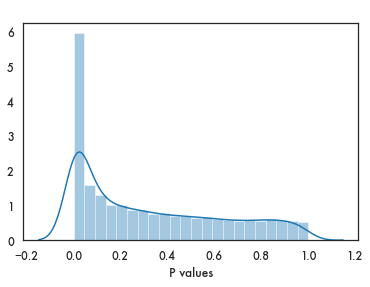

In [75]:
expr_names = [u for u in list(brca.columns) if u.find('NP') > -1] 
            # Find all column names with NP

exprs = brca[expr_names] # Extract the protein data

groups = np.where(brca.ER_Status=='Positive', 1, 0)
pvals_t = np.zeros(exprs.shape[1]) # initialize storage
for i in range(exprs.shape[1]):
    stat, pvals_t[i] = sc.stats.ttest_ind(exprs.iloc[groups==1, i],
                              exprs.iloc[groups==0, i],
                              nan_policy = 'omit')
sns.distplot(pvals_t);
plt.xlabel('P values');

# Regression analysis

## Setup

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf # Use the formula interface to statsmodels

In [77]:
diamonds = sm.datasets.get_rdataset('diamonds','ggplot2').data
mod1 = smf.ols('price ~ np.log(carat) + clarity + depth + cut * color', data = diamonds)
mod1 = mod1.fit() # Actually do the fit
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     4598.
Date:                Thu, 04 Jun 2020   Prob (F-statistic):               0.00
Time:                        11:35:16   Log-Likelihood:            -4.8222e+05
No. Observations:               53940   AIC:                         9.645e+05
Df Residuals:                   53896   BIC:                         9.649e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                    2745.0643    415.804      6.602      0.000    1930.085    3560.043
clarity[T.IF]                4916.7221     83.694     58.746      0.000    4752.681    5080.763
clarity[T.SI1]               2686.1493     71.397     37.623      0.000    2546.210    2826.088
clarity[T.SI2]               2060.8180     71.809     28.699      0.000    1920.072    2201.564
clarity[T.VS1]               3710.1759     72.891     50.900      0.000    3567.309    3853.043
clarity[T.VS2]               3438.3999     71.792     47.894      0.000    3297.687    3579.112
clarity[T.VVS1]              4540.1420     77.314     58.724      0.000    4388.606    4691.678
clarity[T.VVS2]              4343.0545     75.136     57.803      0.000    4195.788    4490.321
cut[T.Good]                   708.5981    161.869      4.378      0.000     391.334    1025.862
cut[T.Ideal]                 1198.2067    149.690      8.005      0.000     904.812    1491.601
cut[T.Premium]               1147.1417    152.896      7.503      0.000     847.464    1446.820
cut[T.Very Good]             1011.3463    152.977      6.611      0.000     711.510    1311.183
color[T.E]                    -59.4094    190.227     -0.312      0.755    -432.256     313.437
color[T.F]                    -86.0097    178.663     -0.481      0.630    -436.191     264.172
color[T.G]                   -370.6455    178.642     -2.075      0.038    -720.784     -20.507
color[T.H]                   -591.0922    179.786     -3.288      0.001    -943.474    -238.710
color[T.I]                  -1030.7417    201.485     -5.116      0.000   -1425.655    -635.829
color[T.J]                  -1210.6501    223.111     -5.426      0.000   -1647.949    -773.351
cut[T.Good]:color[T.E]        -30.3553    212.126     -0.143      0.886    -446.123     385.413
cut[T.Ideal]:color[T.E]      -211.3711    195.630     -1.080      0.280    -594.807     172.065
cut[T.Premium]:color[T.E]     -91.3261    199.440     -0.458      0.647    -482.230     299.578
cut[T.Very Good]:color[T.E]   -45.2968    199.656     -0.227      0.821    -436.625     346.031
cut[T.Good]:color[T.F]       -365.4060    202.035     -1.809      0.071    -761.397      30.585
cut[T.Ideal]:color[T.F]      -198.0428    184.498     -1.073      0.283    -559.661     163.575
cut[T.Premium]:color[T.F]    -322.8527    188.465     -1.713      0.087    -692.246      46.540
cut[T.Very Good]:color[T.F]  -186.0519    189.090     -0.984      0.325    -556.670     184.566
cut[T.Good]:color[T.G]        -93.0430    202.404     -0.460      0.646    -489.757     303.671
cut[T.Ideal]:color[T.G]       -65.8579    183.980     -0.358      0.720    -426.461     294.745
cut[T.Premium]:color[T.G]      35.4302    187.596      0.189      0.850    -332.260     403.121
cut[T.Very 

```
mod1 = smf.glm(
    'price ~ np.log(carat) + clarity + depth + cut * color', 
    data = diamonds)
```

This formula will read as 

price depends on 

+ log(carat), 
+ clarity, depth, cut and color, 
+ and the interaction of cut and color". 

```
mod1 = smf.glm(
    'price ~ np.log(carat) + clarity + depth + cut * color', 
    data = diamonds)
```

color, clarity, and cut are all categorical variables. 

They actually need to be expanded into dummy variables, so we will have one column for each category level, which is 1 when the diamond is of that category and 0 otherwise. 

One less dummy than levels, since we keep a reference level

```
mod1 = smf.glm(
    'price ~ np.log(carat) + clarity + depth + cut * color', 
    data = diamonds)
```

An intercept term is added

```
mod1 = smf.glm(
    'price ~ np.log(carat) + clarity + depth + cut * color', 
    data = diamonds)
```

The variable `carat` is transformed using `np.log`, i.e. the natural logarithm available in the `numpy` package. Generally, any valid Python function can be used here, even ones you create. 

```
mod1 = smf.glm(
    'price ~ np.log(carat) + clarity + depth + cut * color', 
    data = diamonds)
```

Interactions are computed. The syntax `cut * color` is a shortcut for `cut + color + cut:color`, where the `:` denotes interaction. 

```
mod2 = smf.ols(
    'price ~ np.log(carat) + clarity + depth + 
     C(cut, Treatment("Ideal")) * color', 
     data = diamonds).fit()
```

Here we specify that `cut` is a categorical variable, and we are using _treatment contrasts_ with _Ideal_ as the reference category

## Logistic regression

In [78]:
titanic = sm.datasets.get_rdataset('Titanic','Stat2Data').data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1313 non-null   object 
 1   PClass    1313 non-null   object 
 2   Age       756 non-null    float64
 3   Sex       1313 non-null   object 
 4   Survived  1313 non-null   int64  
 5   SexCode   1313 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 61.7+ KB


In [79]:
mod_logistic = smf.glm('Survived ~ Age + Sex + PClass', data=titanic,
  family = sm.families.Binomial()).fit()
mod_logistic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  756
Model:                            GLM   Df Residuals:                      751
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -347.57
Date:                Thu, 04 Jun 2020   Deviance:                       695.14
Time:                        11:44:14   Pearson chi2:                     813.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.8664      0.217      8.587      0.000       1.440       2.292
Sex[T.male]      -2.6314      0.202    -13.058      0.000      -3.026      -2.236
PClass[T.1st]     1.8933      0.208      9.119      0.000       1.486       2.300
PClass[T.2nd]     0.6013      0.148      4.052      0.000       0.310       0.892
PClass[T.3rd]    -0.6282      0.132     -4.754      0.000      -0.887      -0.369
Age              -0.0392      0.008     -5.144      0.000      -0.054      -0.024
=================================================================================
"""

To get odds ratios

In [81]:
np.exp(mod_logistic.params.drop('Intercept'))

Sex[T.male]      0.071981
PClass[T.1st]    6.640989
PClass[T.2nd]    1.824486
PClass[T.3rd]    0.533574
Age              0.961581
dtype: float64

# Machine Learning

## scikit-learn

**scikit-learn** (`sklearn`) is the main machine learning package in Python

1. `sklearn` requires that all inputs be numeric, and in fact, `numpy` arrays.
1. `sklearn` requires that all categorical variables by replaced by 0/1 dummy variables
1. `sklearn` requires us to separate the predictors from the outcome. We need to have one `X` matrix for the predictors and one `y` vector for the outcome.


1. First of all, we know that all `pandas` Series and DataFrame objects can be converted to `numpy` arrays using the `values` or `to_numpy` functions. 
1. Second, we can easily extract a single variable from the data set using either the usual extracton methods or the 
`pop` function. 
1. Third, `pandas` gives us a way to convert all categorical values to numeric dummy variables using the `get_dummies` function. 

In [86]:
import numpy as np
import pandas as pd
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

iris = sm.datasets.get_rdataset('iris').data
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Separate out outcome and predictors

In [87]:
y = iris['Species']
X = iris.drop('Species', axis = 1) # drops column, makes a copy

In [ ]:
# y = iris.pop('Species') # Now iris contains just the predictors

Transform `y` to be numeric

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Transforming the predictors

The usual transformations that we need for heterogeneous predictors is to create _dummy variables_ for the categorical predictors. 

We don't directly have a formula interface in `sklearn`, but we can use tools from `pandas` and `patsy` to take care of this

In [89]:
diamonds = pd.read_csv('data/diamonds.csv.gz')

y = diamonds.pop('price').values
X = pd.get_dummies(diamonds)

# Alternatively
# import patsy
# f = '~ np.log(carat) + clarity + depth + cut * color'
# X = patsy.dmatrix(f, data=diamonds)

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   x              53940 non-null  float64
 4   y              53940 non-null  float64
 5   z              53940 non-null  float64
 6   cut_Fair       53940 non-null  uint8  
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_D        53940 non-null  uint8  
 12  color_E        53940 non-null  uint8  
 13  color_F        53940 non-null  uint8  
 14  color_G        53940 non-null  uint8  
 15  color_H        53940 non-null  uint8  
 16  color_I        53940 non-null  uint8  
 17  color_J        53940 non-null  uint8  
 18  clarit

## Supervised machine learning methods

| ML method               | Code to call it                                              |
| ----------------------- | ------------------------------------------------------------ |
| Decision Tree           | `sklearn.tree.DecisionTreeClassifier`, `sklearn.tree.DecisionTreeRegressor` |
| Random Forest           | `sklearn.ensemble.RandomForestClassifier`, `sklearn.ensemble.RandomForestRegressor` |
| Linear Regression       | `sklearn.linear_model.LinearRegression`                      |
| Logistic Regression     | `sklearn.linear_model.LogisticRegression`                    |
| Support Vector Machines | `sklearn.svm.LinearSVC`, `sklearn.svm.LinearSVR`             |
|                         |                                                              |


The general method that the code will follow is :

```
from sklearn.... import Machine
machine = Machine(*parameters*)
machine.fit(X, y)
```


In [92]:
diamonds = pd.read_csv('data/diamonds.csv.gz')
y = diamonds.pop('price')
d1 = diamonds.select_dtypes(include = 'number')
d2 = diamonds.select_dtypes(exclude = 'number')
from sklearn.preprocessing import scale

bl = pd.DataFrame(scale(d1))
bl.columns = list(d1.columns)
d1 = bl
d2 = pd.get_dummies(d2)
X = pd.concat([d1,d2], axis = 1)

Split the data into a training set and a test set (80/20)

Model build on the training set **only**, and see predictive performance on the test set

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state= 40)

## Initialize 2 models

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


lm = LinearRegression()
dt = DecisionTreeRegressor()


Fit the models to the data

In [96]:
lm.fit(X_train, y_train)
dt.fit(X_train, y_train)



See how the models do on the training set (don't really do or report this)

In [98]:
from sklearn.metrics import  r2_score

print('Linear regression:', r2_score(y_train, lm.predict(X_train)))
print('Decision tree:', r2_score(y_train, dt.predict(X_train)))

Linear regression: 0.9202636015648039
Decision tree: 0.9999965428396391


We're almost certainly overfitting!!

### Visualizing a decision tree

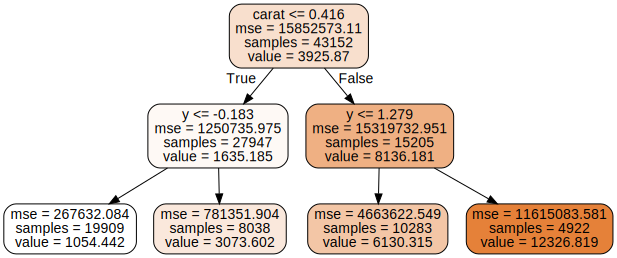

In [100]:
import graphviz
from sklearn import tree

dt = DecisionTreeRegressor(max_depth=2) # Limit to 2 layers
dt.fit(X_train, y_train)
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names = X_train.columns,
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data);
graph

## Cross-validaton

<center><img src = "graphs/CV5.png"/></center>

In [102]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(dt, X_train, y_train, cv=5, scoring='r2')
print("CV average score =", np.round(np.mean(cv_score), 3))

CV average score = 0.829


## Tuning models using cross-validation

In [103]:
from sklearn.model_selection import GridSearchCV
import numpy.random as rnd
rnd.RandomState(39358)

param_grid = {'max_depth': [1,3,5,7, 10], 'min_samples_leaf': [1,5,10,20],
  'max_features' : ['auto','sqrt']}

clf = GridSearchCV(dt, param_grid, scoring = 'r2', cv = 5) # Tuning dt
clf.fit(X_train, y_train)

clf.best_estimator_
print(clf.best_score_)

0.9645325340549133


How does this model do on the test set?

In [104]:
p = clf.best_estimator_.predict(X_test)
r2_score(y_test, p)

0.9657241131204777

# Unsupervised learning

<img src="graphs/cluster_choice.png" height="300"/>

### K-Means clustering

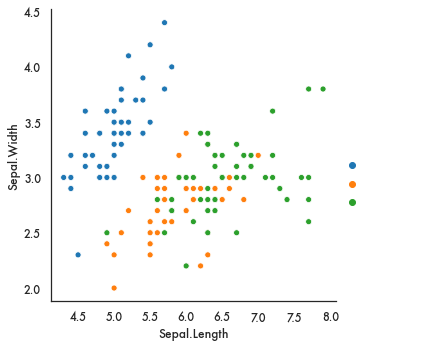

In [105]:
iris = sm.datasets.get_rdataset('iris').data
sns.relplot(data=iris, x = 'Sepal.Length',y = 'Sepal.Width', hue = 'Species');

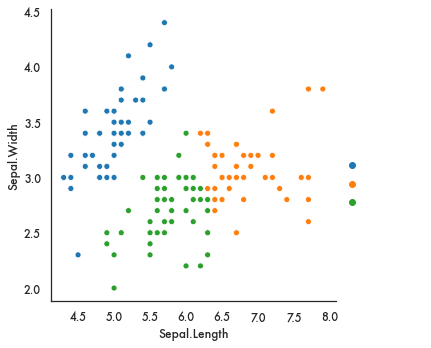

In [107]:
from sklearn.cluster import KMeans, AgglomerativeClustering

km = KMeans(n_clusters = 3)
km.fit(iris[['Sepal.Length','Sepal.Width']]);

iris['km_labels'] = km.labels_
iris['km_labels'] = iris.km_labels.astype('category')

sns.relplot(data=iris, x = 'Sepal.Length', y = 'Sepal.Width', 
           hue = 'km_labels');

### Agglomerative (hierarchical) clustering

In [108]:
from scipy.cluster.hierarchy import dendrogram

## The following is from https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


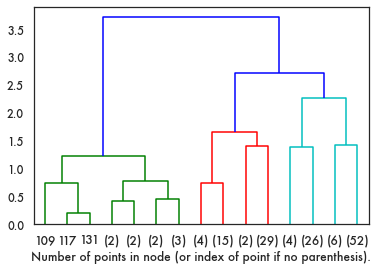

In [110]:
hc = AgglomerativeClustering(distance_threshold=0, n_clusters=None, 
                             linkage='complete')
hc.fit(iris[['Sepal.Length','Sepal.Width']])

plot_dendrogram(hc, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).");

In [111]:
hc = AgglomerativeClustering( n_clusters=3,
                             linkage='average')

hc.fit(iris[['Sepal.Length','Sepal.Width']]);


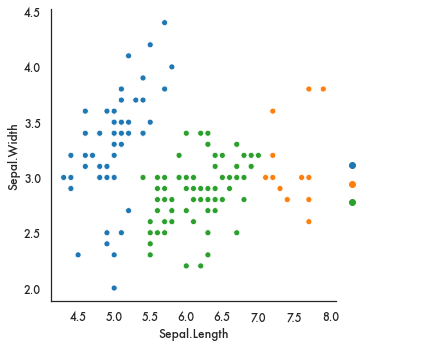

In [112]:
iris['hc_labels'] = pd.Series(hc.labels_).astype('category')

sns.relplot(data=iris, x = 'Sepal.Length', y= 'Sepal.Width', 
           hue = 'hc_labels');